# Pymaceuticals Inc.
---

### Analysis

- Capomulin is the most popular drug for the mice in the test and it very effective before timepoint 20 and straight go low from 20 - 30 and then go back up for a little after 40
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [10]:
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [11]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [13]:
# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how ="left", on="Mouse ID")

# Display the data table for preview
print(merged_data.shape)
merged_data.head()

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice.
unique_mice = merged_data["Mouse ID"].nunique()
print("Number of unique mice:", unique_mice)

Number of unique mice: 249


In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
print("Duplicate Mice IDs:")
for mouse_id in duplicate_mice:
    print(mouse_id)

Duplicate Mice IDs:
g989


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
unique_mice_cleaned = cleaned_data["Mouse ID"].nunique()
print("Updated number of unique mice:", unique_mice_cleaned)

Updated number of unique mice: 249


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
summary_stats = summary_stats.round(2)
print("\nSummary Statistics:")
summary_stats.head()


Summary Statistics:


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
summary_stats.reset_index(inplace=True)
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

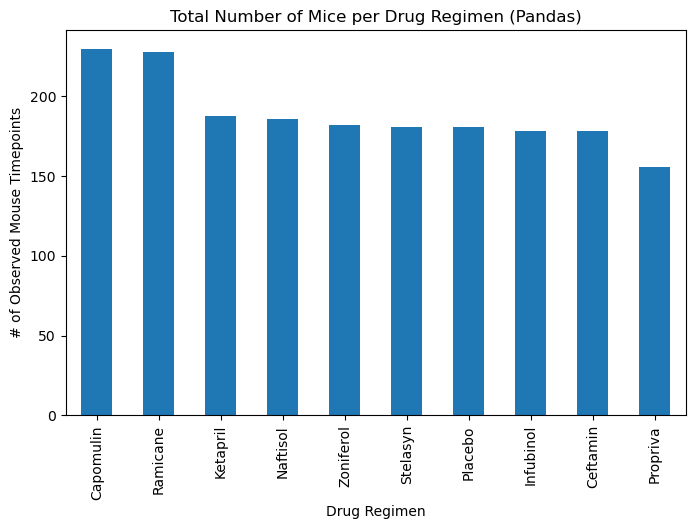

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_pandas = cleaned_data["Drug Regimen"].value_counts().plot(kind="bar", figsize=(8, 5))
bar_chart_pandas.set_xlabel("Drug Regimen")
bar_chart_pandas.set_ylabel("# of Observed Mouse Timepoints")
bar_chart_pandas.set_title("Total Number of Mice per Drug Regimen (Pandas)")
plt.show()

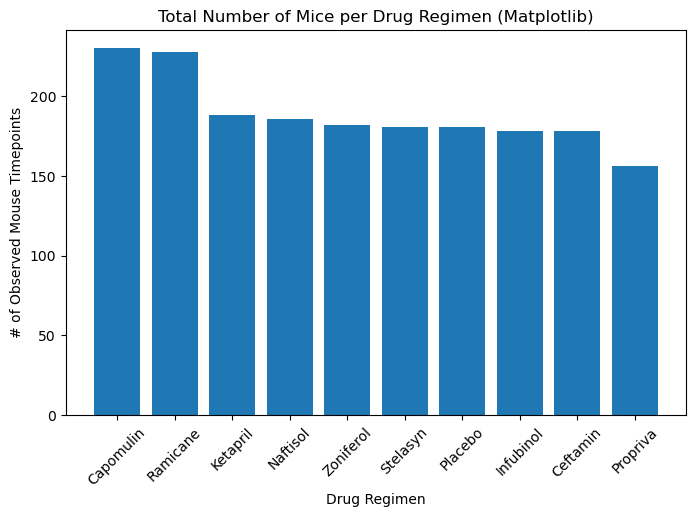

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = cleaned_data["Drug Regimen"].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(drug_counts.index, drug_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Mice per Drug Regimen (Matplotlib)")
plt.xticks(rotation=45)
plt.show()

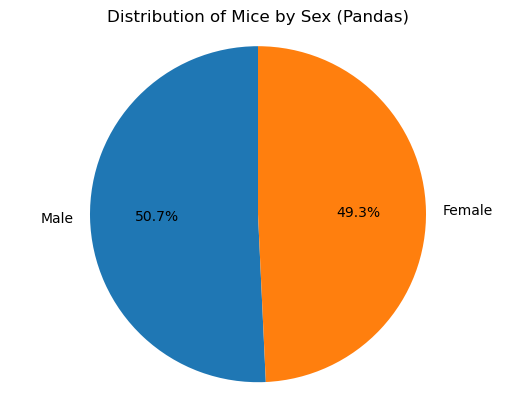

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_pandas = cleaned_data["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
pie_chart_pandas.set_ylabel("")
pie_chart_pandas.set_title("Distribution of Mice by Sex (Pandas)")
plt.axis("equal")
plt.show()

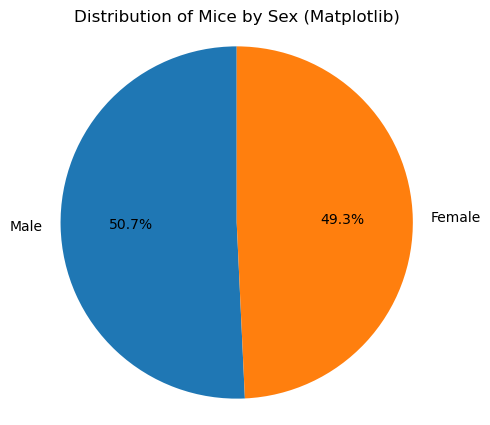

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = cleaned_data["Sex"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sex_counts.values, labels=sex_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Mice by Sex (Matplotlib)")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = merged_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, merged_data, on=["Mouse ID", "Timepoint"], how="left")

In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset to the list of tumor volumes
    tumor_volumes.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    print(f"Potential outliers for {treatment}:")
    print(outliers)

Potential outliers for Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


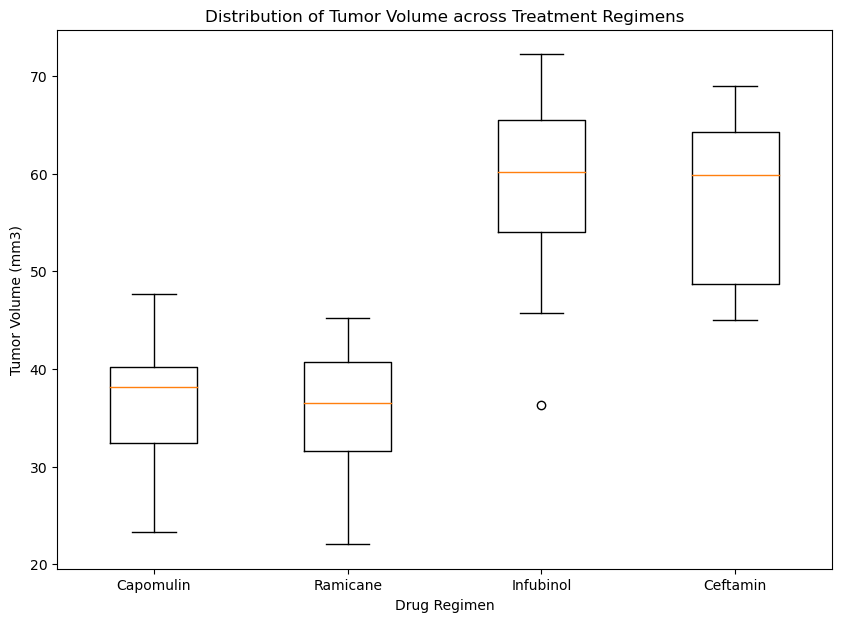

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 7))
plt.boxplot(tumor_volumes, labels=treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume across Treatment Regimens")
plt.show()

## Line and Scatter Plots

In [56]:
selected_mouse_data["Mouse ID"].value_counts()

b128    10
v923    10
m957    10
i557    10
t565    10
l897    10
g288    10
g316    10
y793    10
r944    10
i738    10
w914    10
j119    10
u364    10
s710    10
l509    10
x401    10
b742    10
s185    10
r554    10
m601    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

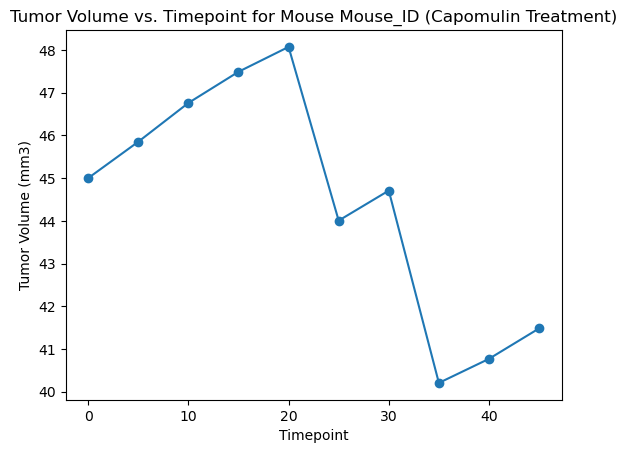

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#selected_mouse_data = merged_data[(merged_data["Mouse ID"] == mouse_id) & (merged_data["Drug Regimen"] == "Capomulin")]
selected_mouse_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
Mouse_data = selected_mouse_data.loc[selected_mouse_data["Mouse ID"] == "l509"]
plt.plot(Mouse_data["Timepoint"], Mouse_data["Tumor Volume (mm3)"], marker = "o")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin Treatment)")
plt.show()

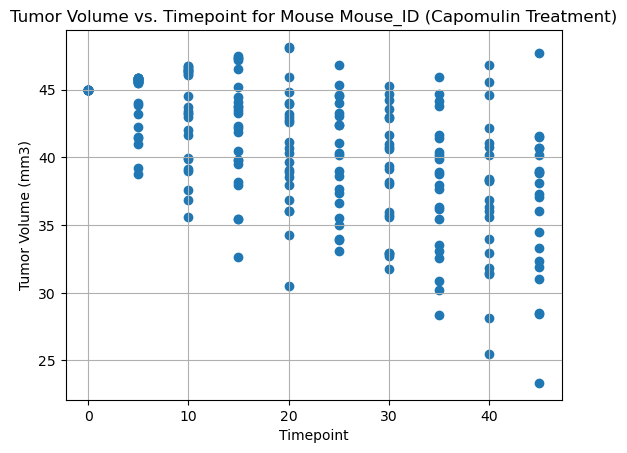

In [48]:
plt.scatter(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin Treatment)")
plt.grid(True)
plt.show()

In [40]:
selected_mouse_data = merged_data[(merged_data["Mouse ID"] == mouse_id) & (merged_data["Drug Regimen"] == "Capomulin")]

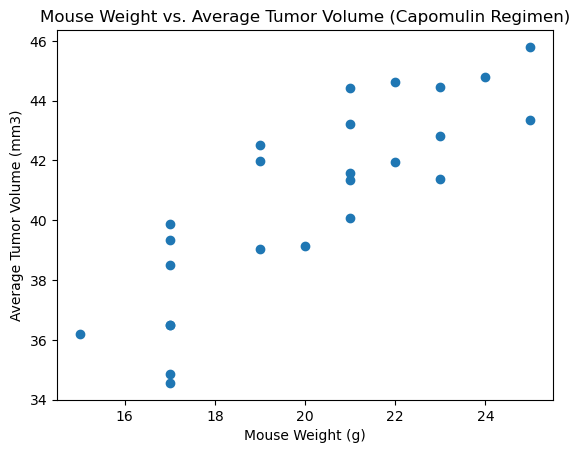

In [62]:
# Get the data for the entire Capomulin regimen
capomulin_data = merged_data[merged_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Generate the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.show()

## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data[merged_data["Drug Regimen"] == "Capomulin"]
correlation = capomulin_data["Weight (g)"].corr(capomulin_data["Tumor Volume (mm3)"])
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
print("Correlation Coefficient:", correlation)

# Print the linear regression model
print("Linear Regression Model:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Correlation Coefficient: 0.5256995552077169
Linear Regression Model:
Slope: 0.9609669432428355
Intercept: 21.489827213299566
R-value: 0.5256995552077169
P-value: 9.605446629501521e-18
Standard Error: 0.10298279892023657
